## 6.4 Machine Learning Part 1


### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#assigning path
path = r'/Users/ishitabhasin/Desktop/Career Foundary Tasks/Achievement 6'

In [4]:
df_choc_clean = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_choc_clean.csv'),index_col = False)

In [5]:
df_choc_clean.head()

,Unnamed: 0,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


### 2. Data wrangling 

In [6]:
df_choc_clean = df_choc_clean.drop("Unnamed: 0", axis='columns')

In [7]:
df_choc_clean.head()

,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Peru


In [8]:
#changing data type for Cocoa_percentage to numeric for ease of analysis
df_choc_clean['Cocoa_percentage'] = df_choc_clean['Cocoa_percentage'].str.replace('%','').astype(float)/100
df_choc_clean.head()

,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


### 3. Conduct consistency checks

In [10]:
df_choc_clean.columns

Index(['Company_name', 'Bar_origin', 'Ref', 'Review_date', 'Cocoa_percentage',
       'Company_location', 'Rating', 'Bean_origin'],
      dtype='object')

In [11]:
df_choc_clean.head(20)

,Company_name,Bar_origin,Ref,Review_date,Cocoa_percentage,Company_location,Rating,Bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru
5,A. Morin,Carenero,1315,2014,0.70,France,2.75,Venezuela
6,A. Morin,Cuba,1315,2014,0.70,France,3.50,Cuba
7,A. Morin,Sur del Lago,1315,2014,0.70,France,3.50,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,0.70,France,3.75,Venezuela
9,A. Morin,Pablino,1319,2014,0.70,France,4.00,Peru


In [12]:
df_choc_clean.shape

(1795, 8)

##### Missing values

In [13]:
df_choc_clean.isnull().sum()

Company_name         0
Bar_origin           0
Ref                  0
Review_date          0
Cocoa_percentage     0
Company_location     0
Rating               0
Bean_origin         74
dtype: int64

##### Duplicates check

In [14]:
dups = df_choc_clean.duplicated()

In [16]:
dups.shape # No duplicates

(1795,)

#### Stats for 1st Variable (Cocoa Percentage)

<Axes: xlabel='Cocoa_percentage', ylabel='Count'>

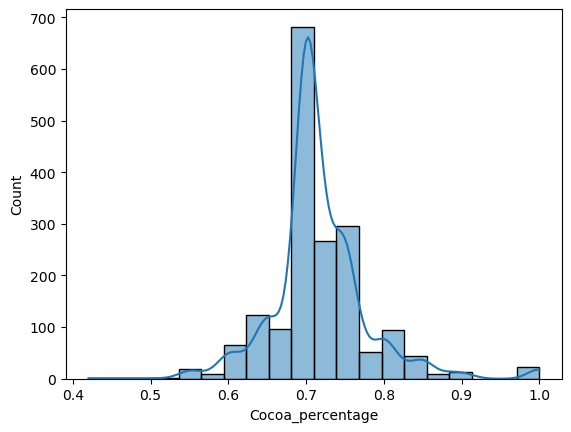

In [17]:
sns.histplot(df_choc_clean['Cocoa_percentage'], bins=20, kde = True)

In [18]:
df_choc_clean['Cocoa_percentage'].mean() # Check the mean

0.7169832869080781

In [19]:
df_choc_clean['Cocoa_percentage'].median() # Check the median

0.7

In [20]:
df_choc_clean['Cocoa_percentage'].max() # Check the max

1.0

#### Stats for 2nd Variable (Rating)

<Axes: xlabel='Rating', ylabel='Count'>

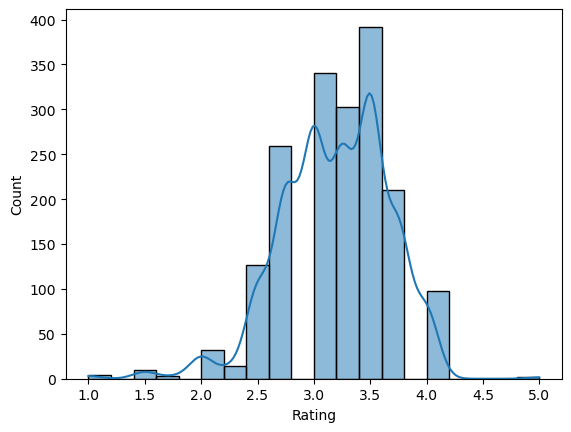

In [21]:
sns.histplot(df_choc_clean['Rating'], bins=20, kde = True)

In [22]:
df_choc_clean['Rating'].mean() # Check the mean

3.185933147632312

In [23]:
df_choc_clean['Rating'].median() # Check the median

3.25

In [24]:
df_choc_clean['Rating'].max() # Check the max

5.0

### 3. Data prep for regression analysis 

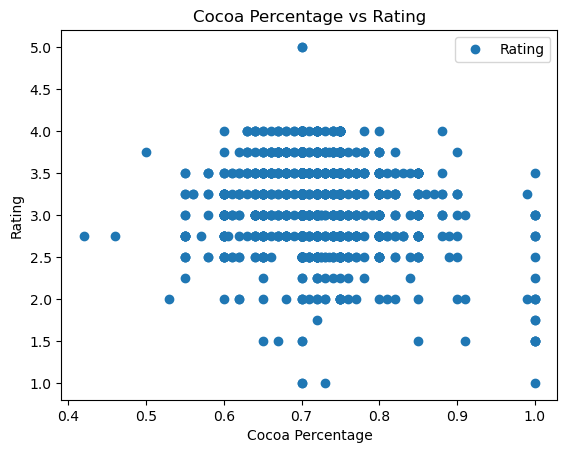

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_choc_clean.plot(x = 'Cocoa_percentage', y='Rating',style='o') 
plt.title('Cocoa Percentage vs Rating')  
plt.xlabel('Cocoa Percentage')  
plt.ylabel('Rating')  
plt.show()

### <div class="alert-info">Hypothesis : Chocolate bars with higher cocoa percentage will have higher ratings</div>


In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_choc_clean['Cocoa_percentage'].values.reshape(-1,1)
y = df_choc_clean['Rating'].values.reshape(-1,1)

In [29]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]])

In [30]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]])

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [32]:
# Create a regression object.

regression = LinearRegression()


In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

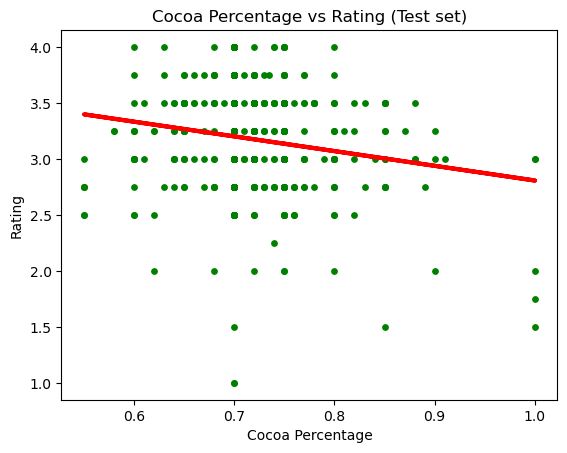

In [35]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percentage vs Rating (Test set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Rating')
plot_test.show()

### <font color = 'teal'>The line does not fit well with the data since there are many data points that are far away from it.</font>



In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.2095351310152621
R2 score:  0.01811002046167509


In [38]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


##### Compare how the regression fits the training set

In [40]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [41]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.22774918296663346
R2 score:  0.029784249226460058


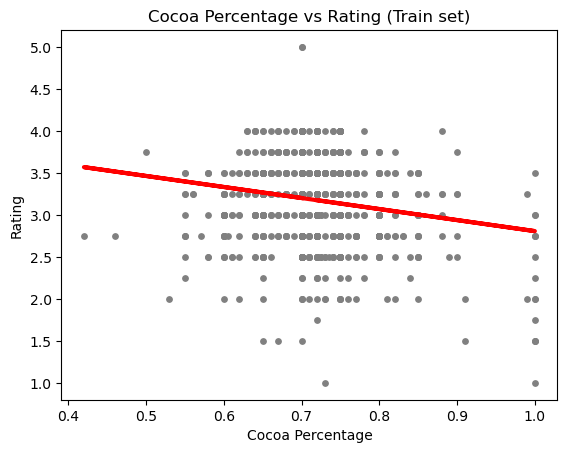

In [43]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percentage vs Rating (Train set)')
plot_test.xlabel('Cocoa Percentage')
plot_test.ylabel('Rating')
plot_test.show()

### <font color ='teal'>  * The model fits the training set only slightly better than the test set. </font>
### <font color ='teal'> * For both models, the R2 score is very low, which shows the the model is a poor fit and the relationship of the data variables is not purely linear. </font>



### Bonus: performance improvement after removing outliers

In [44]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_choc_clean[df_choc_clean['Rating'] <=4] 

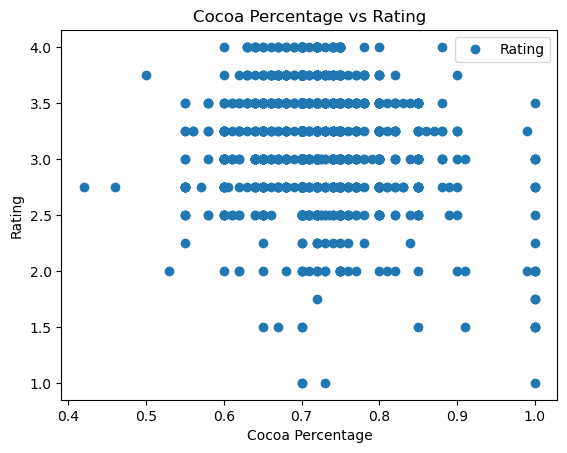

In [45]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Cocoa_percentage', y='Rating', style='o')  
plt.title('Cocoa Percentage vs Rating')  
plt.xlabel('Cocoa Percentage')  
plt.ylabel('Rating')  
plt.show()

In [47]:
# Reshape again.

X_2 = df_test['Cocoa_percentage'].values.reshape(-1,1)
y_2 = df_test['Rating'].values.reshape(-1,1)

In [48]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [49]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [50]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [51]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.50440856]]
Mean squared error:  0.21270940898527144
R2 score:  -0.013664740470597181


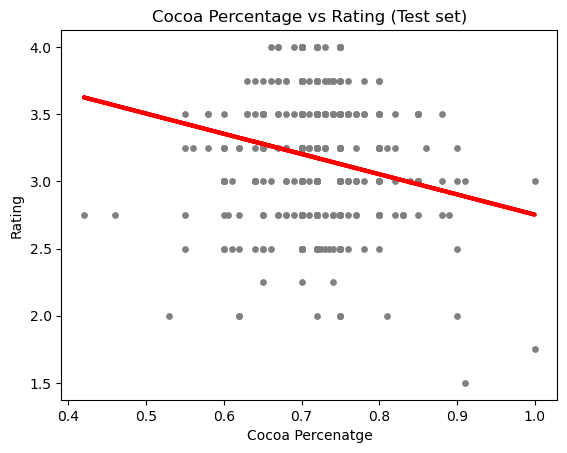

In [53]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Cocoa Percentage vs Rating (Test set)')
plot_test.xlabel('Cocoa Percenatge')
plot_test.ylabel('Rating')
plot_test.show()

In [54]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3.50,3.293578
1,3.50,3.128093
2,2.75,3.248446
3,3.75,3.203314
4,2.75,3.158182
5,3.50,3.278534
6,3.00,3.128093
7,3.75,3.173226
8,3.00,3.128093
9,3.25,3.203314


## <font color ='teal'> Since our analysis does not prove to give us a linear relationship between the chosen variables and therefore can be concluded as inaccurate - we can therefore rule out our hypothesis that " Chocolate bars with higher cocoa percentage will have higher ratings". </font>